In [5]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><br><br><br><br><h1 style="font-size:4em;color:#2467C0">World Development Indicators</h1><br><br><br><br><br>

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [8]:
data.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907


### How many UNIQUE country names are there ?

In [9]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [10]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [11]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [12]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

# Let us plot some parameters

In [13]:
# Filter 1

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [14]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [15]:
countryFilter

['Europe & Central Asia (developing only)', 'United Arab Emirates']

In [16]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Industry, value added (annual % growth)']

In [17]:
filteredData1 = []
filteredData2 = []

In [18]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''

while(len(filteredData1) < len(yearsFilter)-1):
    #pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Household final consumption expenditure, etc. (% of GDP)'] since very few rows (5) found


In [19]:
# What did we pick eventually ?

indicatorsFilter

['Household final consumption expenditure, etc. (% of GDP)']

In [20]:
len(filteredData1)

5

In [21]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

Skipping ... Congo, Dem. Rep., since very few rows (5) found


In [22]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [23]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [24]:
filteredData1

,CountryName,IndicatorName,Year,Value
4899422,Cote d'Ivoire,"Household final consumption expenditure, etc. ...",2010,67.079528
5082591,Cote d'Ivoire,"Household final consumption expenditure, etc. ...",2011,67.565055
5258453,Cote d'Ivoire,"Household final consumption expenditure, etc. ...",2012,66.065640
5427982,Cote d'Ivoire,"Household final consumption expenditure, etc. ...",2013,65.067299
5568058,Cote d'Ivoire,"Household final consumption expenditure, etc. ...",2014,65.517616


In [25]:
filteredData2

,CountryName,IndicatorName,Year,Value
4896586,"Congo, Dem. Rep.","Household final consumption expenditure, etc. ...",2010,80.140650
5079896,"Congo, Dem. Rep.","Household final consumption expenditure, etc. ...",2011,74.657807
5255690,"Congo, Dem. Rep.","Household final consumption expenditure, etc. ...",2012,72.774980
5425514,"Congo, Dem. Rep.","Household final consumption expenditure, etc. ...",2013,72.149788
5566284,"Congo, Dem. Rep.","Household final consumption expenditure, etc. ...",2014,71.471083


# Matplotlib

## Example 1: Plotting country data

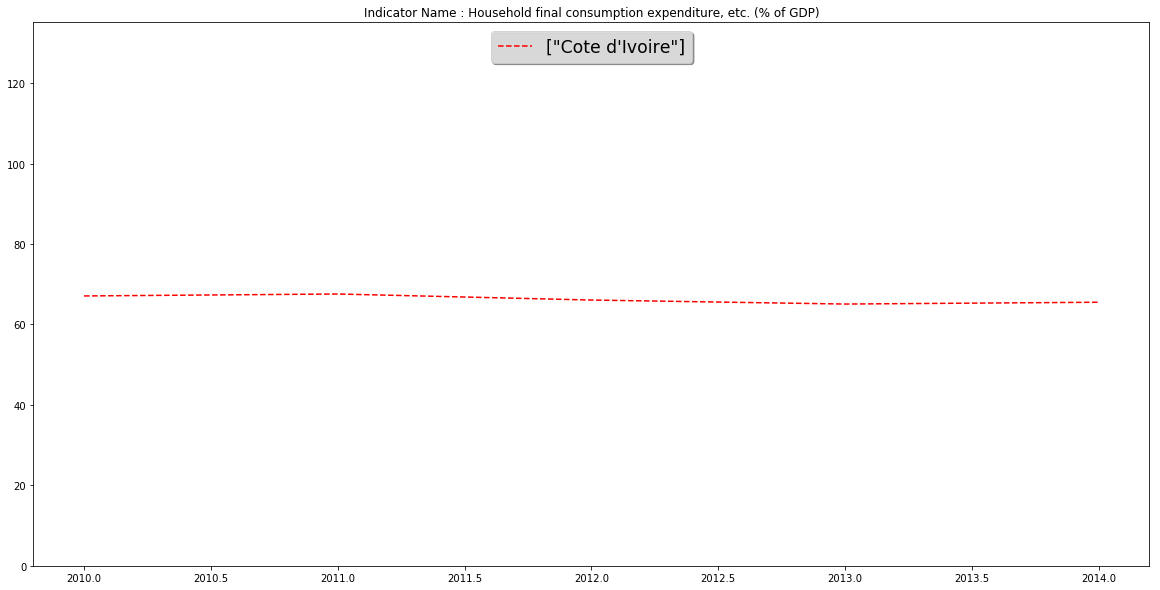

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend:
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle surrounding the legend
frame = legend.get_frame()
frame.set_facecolor('.90')
plt.show()

## Let's plot country #2

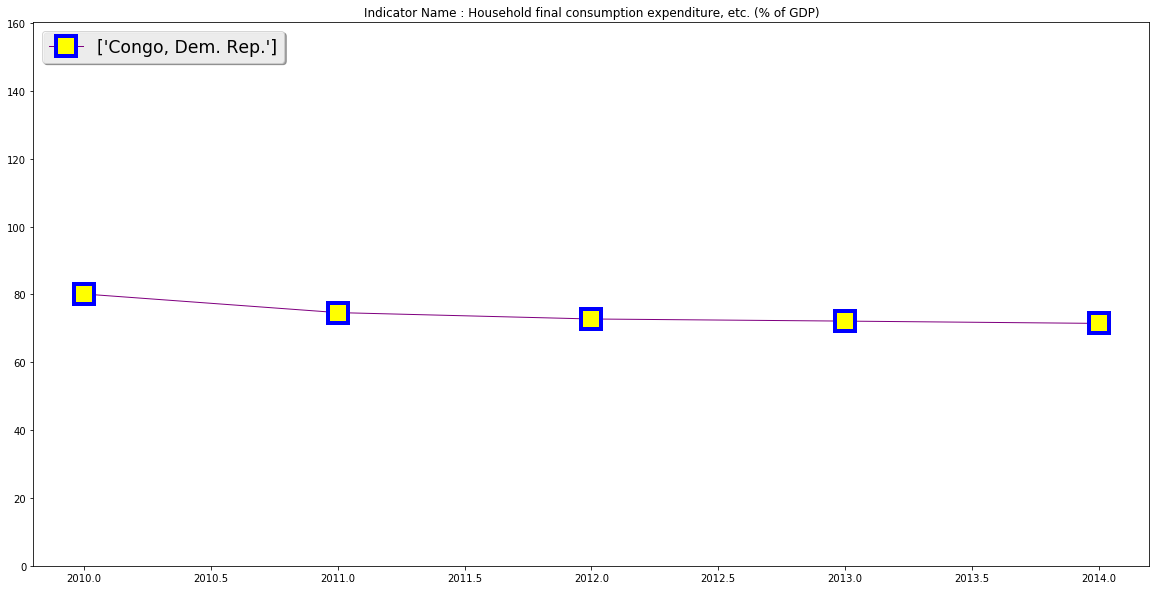

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

#Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())


ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend:
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle surrounding the legengframe = legend.get_frame()
frame.set_facecolor('.90')
plt.show()

# Example 2

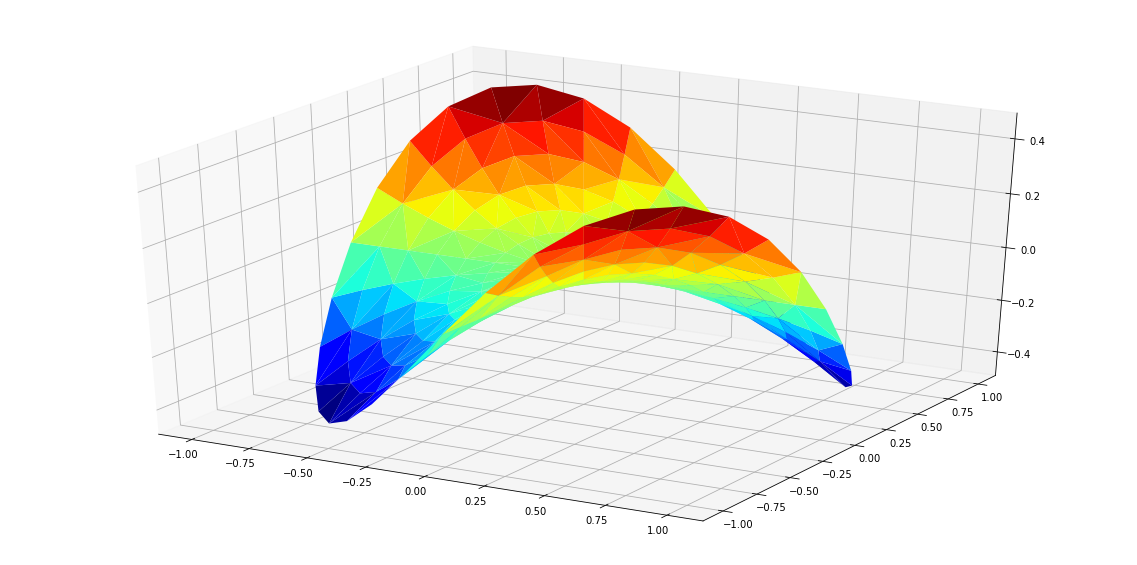

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()

# Example 3

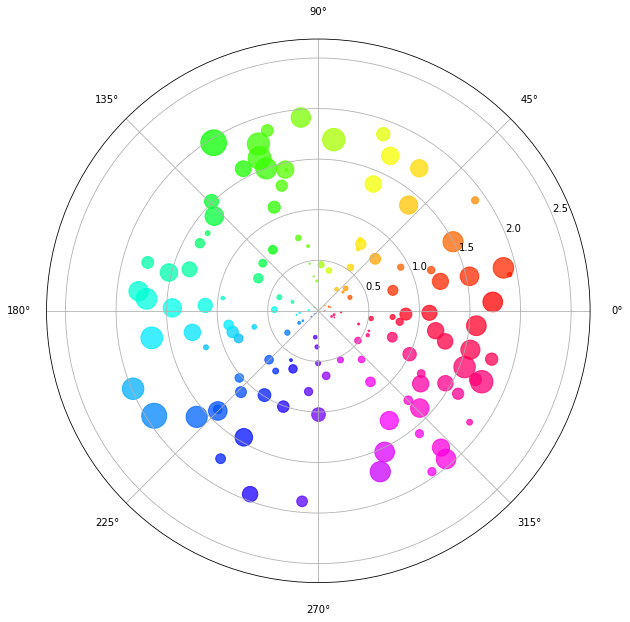

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2 * np.random.rand(N)
colors = theta

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(0.75)

plt.show()

# Example 4: Box Plots

3


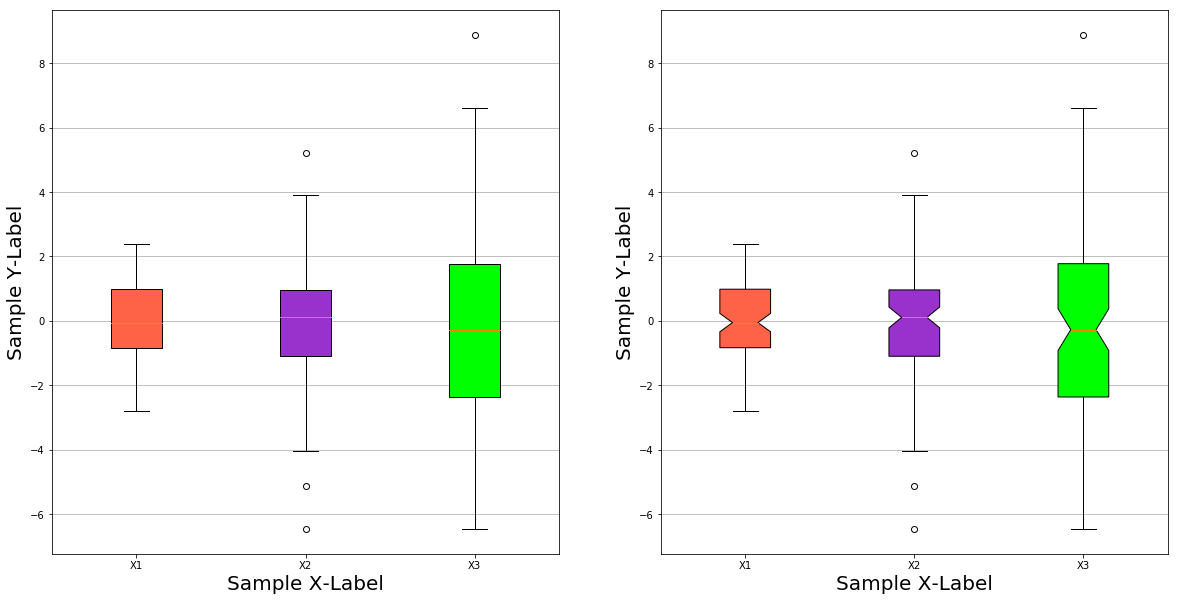

In [16]:
np.random.seed(123)

all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]
print(len(all_data))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Box plot: Rectangular type
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# Box plot: Notch Shape type
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# Colors
colors = ['tomato', 'darkorchid', 'lime']
# more colors here: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# add horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('Sample X-Label',fontsize=20)
    ax.set_ylabel('Sample Y-Label',fontsize=20)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['X1', 'X2', 'X3', 'X4'])

plt.show()

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html